<a href="https://colab.research.google.com/github/a-mhamdi/nlp/blob/main/Jupyter/01_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals and Basic Neural Networks
---

**Outlines**
1. [Introduction to `PyTorch`](#intro)
1. [Tensor operation](#tensor-ops)
1. [Autograd and gradient computation](#grad)
1. [Basic neural network architectures](#nn-arch)

## Introduction to `PyTorch` <a name="intro"></a>


PyTorch is a modern deep learning framework:

* Developed by Facebook's AI Research lab (**FAIR**) in 2016 and released as open-source software [1]
* Features dynamic computational graph (eager execution by default), contrasting with TensorFlow's traditional static approach [2]
* Pythonic design philosophy prioritizes code readability and seamless integration with Python's data science ecosystem [3]
* Gained significant adoption in both academic and industrial research settings [4]
* Excels in research environments due to exceptional flexibility and intuitive debugging capabilities
* Offers native support for GPU acceleration with minimal configuration required
* Comprehensive documentation and vibrant community have contributed to its rapid growth in popularity
* Recent integration with ONNX (Open Neural Network Exchange) improves cross-framework compatibility [5]
---
1. Paszke, A., et al. (2019). PyTorch: An Imperative Style, High-Performance Deep Learning Library [(see paper)](https://arxiv.org/abs/1912.01703). \
1. Stevens, E., et al. (2020). Deep Learning with PyTorch. \
1. Ketkar, N. (2021). Deep Learning with Python: A Hands-on Introduction. \
1. He, K., et al. (2019). Deep Residual Learning for Image  [(see paper)](https://arxiv.org/abs/1512.03385). \
1. Howard, J., & Gugger, S. (2020). Deep Learning for Coders with Fastai and PyTorch [(see ebook)](https://dl.ebooksworld.ir/books/Deep.Learning.for.Coders.with.fastai.and.PyTorch.Howard.Gugger.OReilly.9781492045526.EBooksWorld.ir.pdf).

## Tensor operations <a name="tensor-ops"></a>


In [1]:
import torch

### Creating tensors

In [2]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
print(f"x: {x}")
print(f"y: {y}")

x: tensor([1, 2, 3])
y: tensor([4, 5, 6])


### Basic arithmetic operations

In [3]:
print(f"Addition: {x + y}")         # Element-wise addition
print(f"Subtraction: {x - y}")      # Element-wise subtraction
print(f"Multiplication: {x * y}")   # Element-wise multiplication
print(f"Division: {x / y}\n")       # Element-wise division

Addition: tensor([5, 7, 9])
Subtraction: tensor([-3, -3, -3])
Multiplication: tensor([ 4, 10, 18])
Division: tensor([0.2500, 0.4000, 0.5000])



### Operations and Transformations

#### Create 2D tensors

In [4]:
matrix1 = torch.tensor([[1, 2], [3, 4]])
matrix2 = torch.tensor([[5, 6], [7, 8]])
print(f"Matrix1:\n{matrix1}")
print(f"Matrix2:\n{matrix2}")

Matrix1:
tensor([[1, 2],
        [3, 4]])
Matrix2:
tensor([[5, 6],
        [7, 8]])


#### Matrix multiplication

In [5]:
print(f"Matrix multiplication:\n{torch.matmul(matrix1, matrix2)}")

Matrix multiplication:
tensor([[19, 22],
        [43, 50]])


#### Statistical operations

In [6]:
data = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print(f"Mean: {data.mean()}")
print(f"Sum: {data.sum()}")
print(f"Maximum: {data.max()}")
print(f"Minimum: {data.min()}")
print(f"Standard deviation: {data.std()}")

Mean: 3.0
Sum: 15.0
Maximum: 5.0
Minimum: 1.0
Standard deviation: 1.5811388492584229


#### Reshaping operations

In [7]:
z = torch.tensor([1, 2, 3, 4, 5, 6])
print(f"Original tensor: {z}")
print(f"Reshaped to 2x3:\n{z.reshape(2, 3)}")
print(f"Reshaped to 3x2:\n{z.reshape(3, 2)}")

Original tensor: tensor([1, 2, 3, 4, 5, 6])
Reshaped to 2x3:
tensor([[1, 2, 3],
        [4, 5, 6]])
Reshaped to 3x2:
tensor([[1, 2],
        [3, 4],
        [5, 6]])


### GPU Support demonstration

In [8]:
print("GPU Support:")
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
gpu_tensor = x.to(device)
print(f"Tensor on {device}: {gpu_tensor}") # will run on CPU if CUDA not available

GPU Support:
Using device: cuda
Tensor on cuda: tensor([1, 2, 3], device='cuda:0')


## Autograd and gradient computation <a name="grad"></a>


### Basic autograd example

In [9]:
x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)

In [10]:
# Create a computation graph
z = x**2 + 2*y + 1

In [11]:
# Compute gradients
z.backward()

print(f"x = {x.item()}, y = {y.item()}, z = {z.item()}")
print(f"dz/dx = {x.grad.item()}")     # Should be 2x = 4
print(f"dz/dy = {y.grad.item()}\n")   # Should be 2

x = 2.0, y = 3.0, z = 11.0
dz/dx = 4.0
dz/dy = 2.0




### Gradient computation with vector inputs

In [12]:
# Reset gradients
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

In [13]:
# Vector operations
z = x**2 + y**2

In [14]:
# For vector output, need to sum to get scalar
total = z.sum()
total.backward()

print(f"x = {x}")
print(f"y = {y}")
print(f"z = {z}")
print(f"Gradients for x: {x.grad}")     # Should be 2x
print(f"Gradients for y: {y.grad}\n")   # Should be 2y

x = tensor([1., 2., 3.], requires_grad=True)
y = tensor([4., 5., 6.], requires_grad=True)
z = tensor([17., 29., 45.], grad_fn=<AddBackward0>)
Gradients for x: tensor([2., 4., 6.])
Gradients for y: tensor([ 8., 10., 12.])



### Gradient accumulation and reset

In [15]:
x = torch.tensor([1.0], requires_grad=True)

In [16]:
# First backward pass
y = x**2
y.backward()
print(f"First gradient: {x.grad.item()}")

First gradient: 2.0


In [17]:
# Gradients accumulate by default
y = x**2
y.backward()
print(f"Accumulated gradient (should be doubled): {x.grad.item()}")

Accumulated gradient (should be doubled): 4.0


In [18]:
# Reset gradients
x.grad.zero_()
y = x**2
y.backward()
print(f"After reset: {x.grad.item()}")

After reset: 2.0


### Preventing gradient tracking

In [19]:
x = torch.tensor([2.0], requires_grad=True)

In [20]:
# Using no_grad()
x.grad = None  # Reset gradient
with torch.no_grad():
    y = x * 2
    z = y * 3
print(f"Requires grad in no_grad(): {y.requires_grad}\n")

Requires grad in no_grad(): False




### Computing higher-order gradients

In [21]:
x = torch.tensor([2.0], requires_grad=True)

In [22]:
y = x**3

#### First derivative

In [23]:
first_derivative = torch.autograd.grad(y, x, create_graph=True)[0]
print(f"First derivative at x=2: {first_derivative.item()}")

First derivative at x=2: 12.0


#### Second derivative

In [24]:
second_derivative = torch.autograd.grad(first_derivative, x)[0]
print(f"Second derivative at x=2: {second_derivative.item()}")

Second derivative at x=2: 12.0


## Basic neural network architectures <a name="nn-arch"></a>


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Create synthetic dataset

In [26]:
X = torch.linspace(-10, 10, 100).reshape(-1, 1)
y = torch.sin(X) + torch.normal(0, 0.1, size=X.shape)

### Define the neural network

In [27]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(1, 16)    # Input layer -> Hidden layer
        self.activation1 = nn.ReLU()      # Activation function
        self.layer2 = nn.Linear(16, 16)   # Hidden layer -> Hidden layer
        self.activation2 = nn.ReLU()      # Activation function
        self.layer3 = nn.Linear(16, 1)    # Hidden layer -> Output layer

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.layer3(x)
        return x

### Initialize the model, loss function, and optimizer

In [28]:
model = Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Training loop

In [29]:
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2362
Epoch [200/1000], Loss: 0.1293
Epoch [300/1000], Loss: 0.1057
Epoch [400/1000], Loss: 0.1099
Epoch [500/1000], Loss: 0.1052
Epoch [600/1000], Loss: 0.1052
Epoch [700/1000], Loss: 0.1052
Epoch [800/1000], Loss: 0.1051
Epoch [900/1000], Loss: 0.1052
Epoch [1000/1000], Loss: 0.1052


### Evaluate the model

In [30]:
model.eval()
with torch.no_grad():
    predictions = model(X)

### Plotting the results

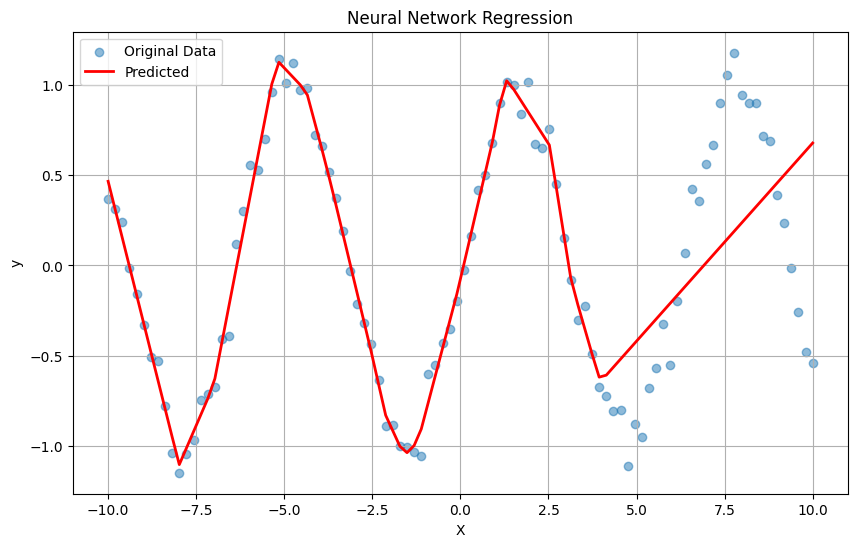

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label='Original Data', alpha=0.5)
plt.plot(X.numpy(), predictions.numpy(), 'r', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression')
plt.legend()
plt.grid(True)

### Example of using the trained model for prediction

In [32]:
test_input = torch.tensor([[2.0]])
prediction = model(test_input)
print(f"Prediction for input {test_input.item()}: {prediction.item():.4f}")

Prediction for input 2.0: 0.8253
